# Logisitc Regression

Logistic Regression is the probability of being in a particular class. For example, given two groups (class A and class B). What is the probability that a given dataset is in Class A as opposed to Class B?

# Logistic Regression vs Linear Regression

Logistic Regression applies an activation function to categorize a given dataset into categories based on a probability (between 0 and 1). Linear Regression outputs continuous numerical values to show a correlation.

Linear Regression = y = b0 + b1x

Logistic Model = p = 1 / 1 + e^-(b0 + b1x)

"If the probability results in greater than 50%, then this dataset belongs in group A. If it is less than 50%, then this dataset belongs in group B."

# Logistic Regression is a statistical method for predicting binary outcomes from data.

Example: yes vs no, or young vs old

# We can calculate Logistic Regression by adding an "ACTIVATION FUNCTION" as a final step in our linear model --> converting the linear regression output into a probability

In [1]:
# Dependencies

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
# Step 1: Gather data (here we cluster the data by using "make_blobs")

from sklearn.datasets import make_blobs

X, y = make_blobs(centers=2, random_state=42)

print(f"Labels: {y[:10]}")
print(f"Data: {X[:10]}")

Labels: [0 1 0 1 1 0 1 1 0 0]
Data: [[-2.98837186  8.82862715]
 [ 5.72293008  3.02697174]
 [-3.05358035  9.12520872]
 [ 5.461939    3.86996267]
 [ 4.86733877  3.28031244]
 [-2.14780202 10.55232269]
 [ 4.91656964  2.80035293]
 [ 3.08921541  2.04173266]
 [-2.90130578  7.55077118]
 [-3.34841515  8.70507375]]


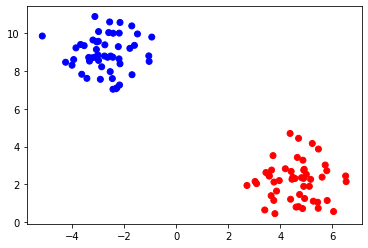

In [5]:
# Optional step: Visualize the data

col = np.where(y==0, 'blue', 'red')
plt.scatter(X[:, 0], X[:, 1], c=col)

In [6]:
# Step 2: Split the data into training and testing datasets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

# BEGIN LOGISTIC REGRESSION HERE

In [7]:
# Step 3: Create a Logistic Regression Model

from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [8]:
# Step 4: Fit(train) the model using training data
classifier.fit(X_train, y_train)

/Users/gianmillare/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
# Step 5: Validate the model using testing data using the ".score" method

print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 1.0
Testing Data Score: 1.0


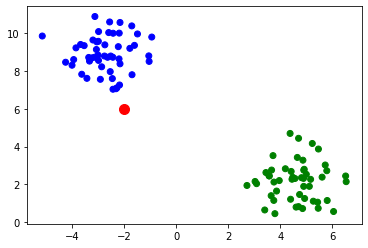

In [11]:
# Step 6: Make predictions

new_data = np.array([[-2, 6]])
# This is a list of lists that we convert into a numpy array so it becomes a two-dimensional array that is "[1,1]"

col = np.where(y==0, 'blue', 'green')
plt.scatter(X[:, 0], X[:, 1], c=col)
plt.scatter(new_data[0,0], new_data[0,1], c="r", marker="o", s=100)

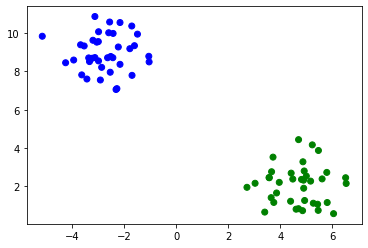

In [12]:
# Step 7: Plot the training results using the ".predict" method

col = np.where(classifier.predict(X_train)==0, 'blue', 'green')
plt.scatter(X_train[:, 0], X_train[:, 1], c=col)

In [13]:
# Step 8: Predict the class of the new data points

predictions = classifier.predict(new_data)
print("Classes are either 0 (blue) or 1 (green)")
print(f"The new point was classified as {predictions}")

Classes are either 0 (blue) or 1 (green)
The new point was classified as [0]


In [15]:
predictions = classifier.predict(X_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})

,Prediction,Actual
0,1,1
1,0,0
2,1,1
3,1,1
4,1,1
5,0,0
6,1,1
7,1,1
8,1,1
9,0,0
